In [1]:
from hydra import initialize, compose
from tqdm import tqdm
with initialize(version_base=None, config_path="../../src/conf/"):
    cfg = compose(config_name='main.yaml', overrides=["local=default"])
    print(cfg)

{'num_workers': 1, 'extraction': {'_target_': 'src.feature.extract.NameFeatureExtraction', 'graph_path': '${arcan_graphs}', 'out_path': '${out_path}/processed/', 'stopwords': 'None'}, 'embedding': {'_target_': 'src.feature.embedding.FastTextEmbedding', 'model': 'fastText', 'path': '${base_path}/data/models/wiki.en.bin'}, 'base_path': '/home/sasce/PycharmProjects/CodeGraphClassification', 'out_path': '${base_path}/data/', 'arcan_out': '${base_path}/data/interim/', 'arcan_graphs': '${arcan_out}/arcanOutput', 'dataset': '${base_path}/data/raw/classification_dataset_lang.csv', 'language': 'JAVA', 'repositories_path': '${base_path}/data/raw/repositories/', 'arcan_script': '${base_path}/scripts/bash/run-arcan.sh', 'arcan_path': '${base_path}/tools/arcan', 'repository_path': '${base_path}/data/raw/repositories', 'logs_path': '${base_path}/logs/'}


In [2]:
from os.path import join
import pathlib

arcan_path_project = pathlib.Path(join(cfg.arcan_out, 'arcanOutput/'))
projects = list(arcan_path_project.glob('**/*.graphml'))
print(f"Number of projects {len(projects)}")

Number of projects 60337


In [25]:
projects[1]

PosixPath('/home/sasce/PycharmProjects/CodeGraphClassification/data/interim/arcanOutput/Norconex|collector-filesystem/dependency-graph-63_c01cf7bf4093aa21fafc1fba93ba50ca0343c619.graphml')

# Statistics

#### 1 - Graph size

In [3]:
from data.graph import ArcanGraphLoader

num_nodes = []
num_edges = []

loader = ArcanGraphLoader()
empty = 0
for project_path in tqdm(projects):
    try:
        project = loader.load(str(project_path))
        num_edges.append(len(project.es))
        num_nodes.append(len(project.vs))
    except:
        empty += 1

100%|██████████| 60337/60337 [17:30<00:00, 57.43it/s]  


In [4]:
import numpy as np

print(f'Number of nodes on average: {np.mean(num_nodes)}')
print(f'Number of edges on average: {np.mean(num_edges)}')
print(f'Number of min nodes: {np.min(num_nodes)}')
print(f'Number of max nodes: {np.max(num_nodes)}')
print(f'Number of min edges: {np.min(num_edges)}')
print(f'Number of max edges: {np.max(num_edges)}')


Number of nodes on average: 349.43303719419214
Number of edges on average: 2931.1985347742493
Number of min nodes: 1
Number of max nodes: 8971
Number of min edges: 0
Number of max edges: 93408


In [7]:
count = sum([1 for x in num_edges if x < 5000])

In [8]:
print(count)

51055


In [9]:
import seaborn as sns

<AxesSubplot: >

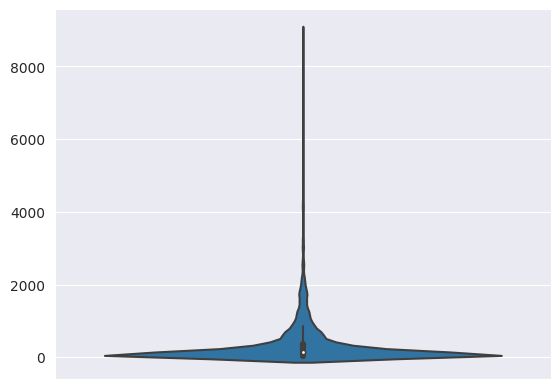

In [24]:
sns.violinplot(y=num_nodes)

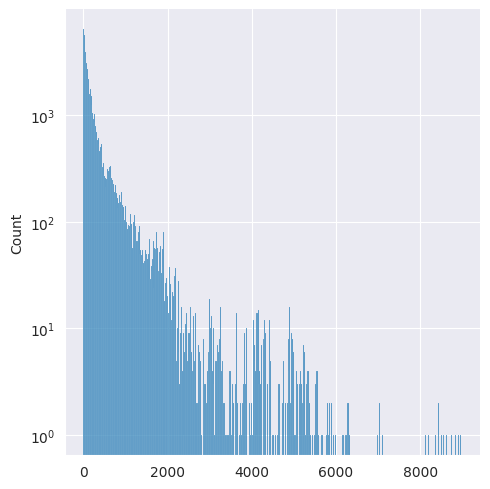

In [22]:
sns.displot(x=num_nodes,log_scale=(False, True))